# Molecular Dynamics Simulation
## Using Monte Carlo Simulation


For a set of particles at the temperature T, the probability that such a particle occupies an energy level $E_i$ is:

$$p(E_i) = \frac{e^{-E_i / k_B T}}{\sum_i e^{-E_i / k_B T}}$$

The "Ising" method models a system for interacting spins on a lattice. In this case we will construct our code around the assumption of a square lattice of spin -1/2 particles, that will interect with its nearest neighbours and a small magnetic field. Such a model is appropriate for systems such as ferromagnets.

In this case, the Energy is:

$$E = -\sum_i s_i (mB+J\sum_js_j)$$

where $i$ and $j$ index a lattice site. $s_i$ is spins which has values of 1 or -1. $m$ =1/2 and J = quantum mechanical exchange coupling between spins.

In [1]:
# Appropriate imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()

### 1. Set up the initial arrangements of spins

Here we setup a box with 50x50 spins, that are randomly initialised to 1 or -1.


Text(0, 0.5, 'width of baox')

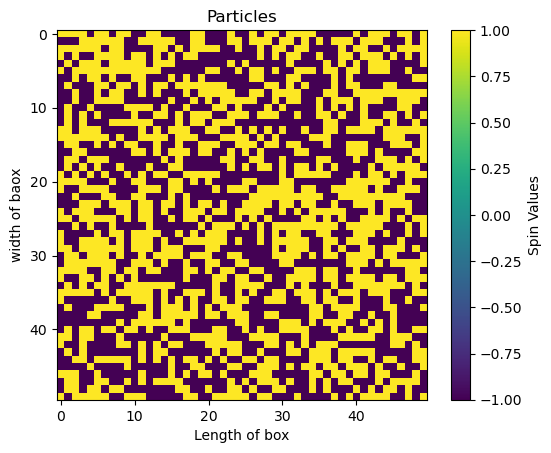

In [2]:
boxlen    = 50 #m
B_over_kT = 0 
J_over_kT = 0.5
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))

#Imshow plot with labels
plt.imshow(spins)
plt.colorbar(label="Spin Values")
plt.title("Particles")
plt.xlabel("Length of box")
plt.ylabel("width of baox")


### 2. Calculate the energy

In [3]:
#Using np.roll to find the nearest neighbours in 4 directions on two axis, hence 
#4 nearest neighbours
sum_neigh_spins = (np.roll( spins, 1, axis=0 ) + np.roll( spins, -1, axis=0 ) 
                   + np.roll(spins, 1, axis=1  ) + np.roll( spins, -1, axis=1 ) )



etot0 = -np.sum( spins *(B_over_kT + J_over_kT * sum_neigh_spins) ) #Calculating Total Energy (Joules)

print("Starting energy is ",etot0, "J") 

Starting energy is  -36.0 J


### 3. Write the swap function



In [4]:
def update_swap(spins,i1,j1,i2,j2):
    """
    Function to perform trial update on spin array.
    
    Input:
    Takes two locations and spin array
    
    Output:
    
    Functions evaluates the energy change if the the spin is -
    flipped and outputs the energy change
    """
    i1m1 = (i1-1)%boxlen
    i1p1 = (i1+1)%boxlen
    j1m1 = (j1-1)%boxlen
    j1p1 = (j1+1)%boxlen
    sum_neigh_spins1 = spins[i1m1,j1] + spins[i1p1,j1] + spins[i1, j1m1] + spins[i1, j1p1]
    
    i2m1 = (i2-1)%boxlen
    i2p1 = (i2+1)%boxlen
    j2m1 = (j2-1)%boxlen
    j2p1 = (j2+1)%boxlen
    sum_neigh_spins2 = spins[i2m1,j2] + spins[i2p1,j2] + spins[i2, j2m1] + spins[i2, j2p1]
    
    
    diff_spins = sum_neigh_spins1 - sum_neigh_spins2
    
    
    # The change in energy ...
    de = ( 2*spins[i1,j1] - 2*spins[i2,j2])*(J_over_kT*diff_spins + B_over_kT)
    #de = (2*spins[i1,j1]*(J_over_kT*sum_neigh_spins1 + B_over_kT) 
          
          #+ 2*spins[i2,j2]*(J_over_kT*sum_neigh_spins2 + B_over_kT))  


    p = np.exp(-de)
    
    if de<0 or rng.random() < p:
        spins[i1,j1] = spins[i2,j2]
        #spins[i1,j1] = -spins[i2,j2]
        #spins[i2,j2] = -spins[i2,j2]
    else:
        de = 0.0
    return de

print(rng.integers(boxlen),rng.integers(boxlen))

18 32


### 4. Run the simulation

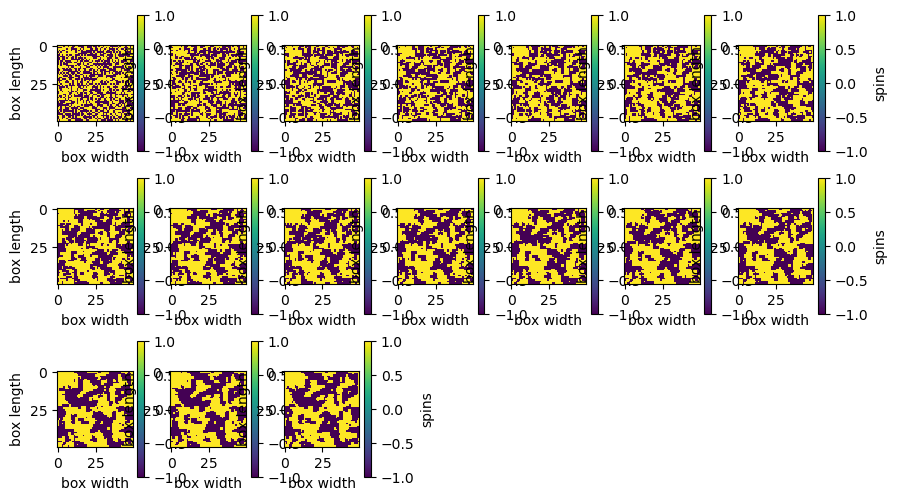

In [5]:
Nsteps = 50000
etot = np.zeros(Nsteps+1)
#sum_neigh_spins already defined above 
etot[0] = etot0
figIsing = plt.figure(figsize=(10,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen),rng.integers(boxlen)
    this_i2, this_j2 = rng.integers(boxlen),rng.integers(boxlen)
    
    de = update_swap(spins,this_i1,this_j1,this_i2,this_j2)
    
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    if i%3000==0:
        ax = figIsing.add_subplot(3,7,index)
        image = ax.imshow(spins,interpolation='none')
        plt.colorbar(mappable=image, label="spins")
        ax.set_xlabel("box width")
        ax.set_ylabel("box length")
        index +=1

### 5. Show total energy


Text(0.5, 1.0, 'Total energy')

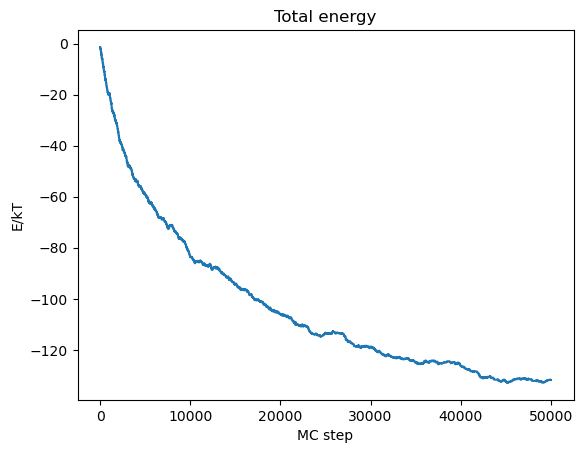

In [6]:
plt.plot( etot/ (J_over_kT * len(spins)) ) #Normalising etot
plt.xlabel('MC step')
plt.ylabel('E/kT')
plt.title('Total energy')

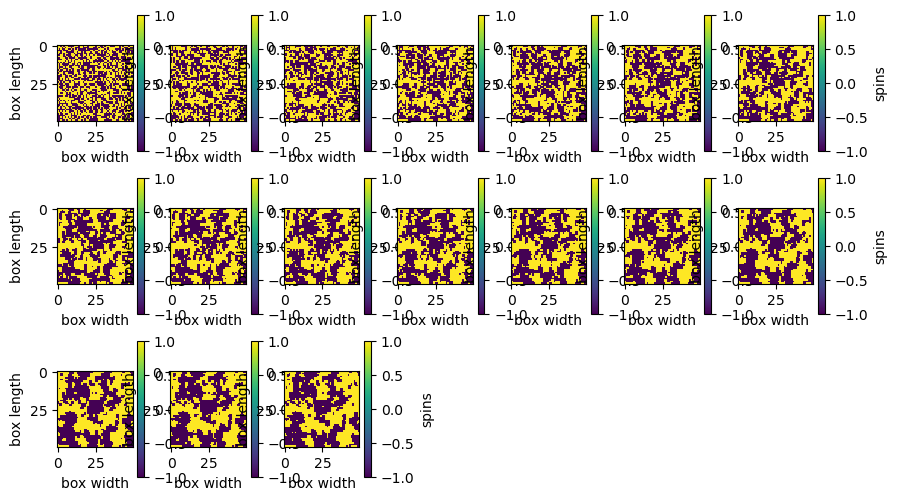

In [7]:
J_over_kT1 = 1
spins = (-1)**rng.integers(0,2,size=(boxlen,boxlen))

# Repeat simulation
Nsteps = 50000
etot = np.zeros(Nsteps+1)
#sum_neigh_spins already defined above 
etot[0] = etot0
figIsing = plt.figure(figsize=(10,6))
index = 1
for i in range(Nsteps):
    # Select two points at random to test
    this_i1, this_j1 = rng.integers(boxlen),rng.integers(boxlen)
    this_i2, this_j2 = rng.integers(boxlen),rng.integers(boxlen)
    
    de = update_swap(spins,this_i1,this_j1,this_i2,this_j2)
    
    sum_neigh_spins = (np.roll(spins,1,axis=0)+np.roll(spins,-1,axis=0)+
                       np.roll(spins,1,axis=1)+np.roll(spins,-1,axis=1))
    
    etot[i+1] = -np.sum(spins*(B_over_kT + J_over_kT*sum_neigh_spins))
    if i%3000==0:
        ax = figIsing.add_subplot(3,7,index)
        image = ax.imshow(spins,interpolation='none')
        plt.colorbar(mappable=image, label="spins")
        ax.set_xlabel("box width")
        ax.set_ylabel("box length")
        index +=1


Text(0.5, 1.0, 'Total energy')

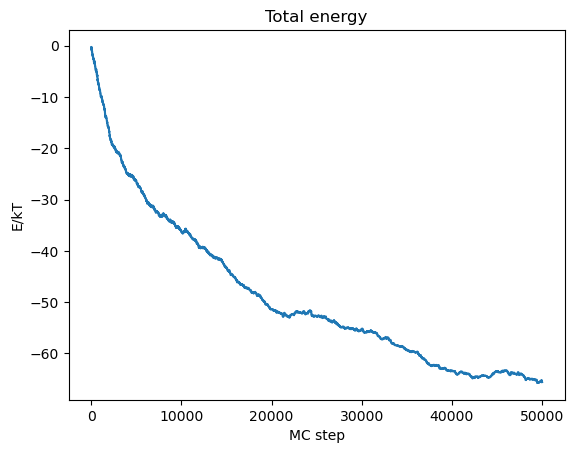

In [8]:
plt.plot( etot/ (J_over_kT1 * len(spins)) ) #Normalising total energy
plt.xlabel('MC step')
plt.ylabel('E/kT')
plt.title('Total energy')

## Conclusion


Comparing the first and last plt.imshow() series of plots, which shows how the particle spin changes as the system progresses to reach equilibrium in the ising model, we can see that the second plot reaches to the final point much quicker than the first plot.

The reason why such a change might occur can be drawn from the energy over mc step plot. The first one we can observe an exponentially decreasing energy, however the decrease is relatively faster than the second plot. In the second plot we see an slower rate if decay in energy due to the higher value of J/kBT. Hence it reaches equilibrium point slower. 

Comparing the values of normalised energy at MC_step = 10,000:

First Graph: -100 < E/kT < -80

Second Graph: E/kT = -40

However it is also worth noting that when rerunning the simulation, they initial values are not the same since we use a random number generator. Hence the difference vary from each run of the simulation, but we see rough comparison that yeild about a factor of 2 (rough estimate) difference in rate of decay of energy.